# Project Deliverable 1 - Group 33
#### Group Members: Bethany Findlay, Charlotte Albert, Kaykay Akpama, Kosi Udechukwu

This project focuses on predicting taxi trip durations in New York City using data from Kaggle. The dataset includes details such as pickup and drop-off locations, passenger count, and time of day. Our goal is to apply regression techniques to build a model that accurately predicts trip duration and to gain practical experience with data preprocessing and modeling using scikit-learn.


## Dataset Choice
We selected the New York City Taxi Trip Duration dataset from Kaggle. https://www.kaggle.com/competitions/nyc-taxi-trip-duration/codehttps://www.kaggle.com/competitions/nyc-taxi-trip-duration/code. This dataset contains detailed information about over one million taxi trips in New York City, including pickup and drop-off locations, passenger counts, vendor IDs, and total trip durations(in seconds).

We chose this dataset because it provides a real-world and engaging regression challenge.
- Interest: Predicting taxi trip duration connects to real-life transportation and city mobility, which makes the problem applicable and practical.
- Feasibility: The dataset is large, well-structured, understandable and contains a mix of categorical and numerical features, making it suitable for learning how to create a regression model.
- Learning Value: This dataset allows our group to apply key data analytics concepts such as feature selection, regression modeling, and evaluation metrics. It also offers opportunities for learning about geospatial and time-based variables, both of which are valuable for building predictive models.

### Initial Understanding of the Dataset
- Input(features): pickup and drop-off coordinates, pickup and dropoff datetime, vendor ID, passenger count, and store-and-forward flag.
- Target variable: trip_duration (measured in seconds).

The dataset contains both numerical and categorical features, allowing for a mix of regression modeling techniques.

### Plan for Modeling Stages
We plan to build the model in three main stages:
- Baseline model: Begin with a simple regression model(e.g., Linear Regression) using key numerical features.
- Feature engineering: Add new variables such as trip distance and time-based features(e.g., pickup hour, weekday). 
- Advanced models and tuning: Experiment with tree-based models(e.g., Random Forest, XGBoost) and tune hyperparameters for better accuracy.

Our project will use scikit-learn as the main framework for preprocessing, modeling, and validation. It provides tools for handling missing data, encoding categorical variables, and splitting data into training and testing sets. Scikit-learn also includes various regression models like Linear Regression and Random Forest, as well as evaluation metrics such as MAE and RMSE. This makes it ideal for building and testing our predictive models efficiently.




## Data Dictionary
id 
- Description: A unique code assigned to each taxi trip record. It helps identify every trip in the dataset.
- Units: None(it’s just an identifier, a label and not a measurement)
- Type: Categorical

vendor_id
- Description: The ID number representing which taxi company provided the trip. There are two possible companies, coded as 1 or 2.
- Units: None(categorical code representing taxi company)
- Type: Categorical

pickup_datetime
- Description: The exact date and time when the trip started(when the passenger was picked up).
- Units:DateTime
- Type: Categorical

dropoff_datetime
- Description: The exact date and time when the trip ended (when the passenger was dropped off).
- Units:DateTime
- Type: Categorical

passenger_count
- Description: The number of people in the taxi during the trip.
- Units:count(persons)
- Type: Numerical

pickup_longitude
- Description: The geographic longitude coordinate where the trip began.
- Units:Degrees(longitude)
- Type: Numerical

pickup_latitude
- Description: The geographic latitude coordinate where the trip began.
- Units:Degrees(latitude)
- Type: Numerical

dropoff_longitude
- Description: The geographic longitude coordinate where the trip ended.
- Units:Degrees(longitude)
- Type: Numerical

dropoff_latitude
- Description: The geographic latitude coordinate where the trip ended.
- Units:Degrees(latitude)
- Type: Numerical

store_and_fwd_flag
- Description: A flag indicating whether the trip data was stored in the taxi’s memory before being sent to the central server. Y means “yes,” “N” means “no.”
- Units:None(binary category, “Y” or “N”)
- Type: Categorical

trip_duration(Target Variable)
- Description:The total amount of time the trip lasted, calculated as the difference between drop-off and pickup times. This is what the model predicts.
- Units:Seconds
- Type: Numerical

Inputs(features): All columns except trip_duration
Target: trip_duration

### REFERENCES
@misc{nyc-taxi-trip-duration,
    author = {Meg Risdal},
    title = {New York City Taxi Trip Duration},
    year = {2017},
    howpublished = {\url{https://kaggle.com/competitions/nyc-taxi-trip-duration}},
    note = {Kaggle}
}





# Exploratory Data Analysis (EDA)

In [1]:
#Install dependencies and read dataset as df

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# read the CSV
df = pd.read_csv('train.csv')

In [2]:
print(df.head())
# number of rows and columns
df.shape

          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731

(1458644, 11)

In [3]:
# show number of records in each column, type of data, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
# ensure the object data types are converted to standard datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], errors='coerce')
# check if there are values that could not be converted
df['pickup_datetime'].isna().sum()
df['dropoff_datetime'].isna().sum()

np.int64(0)

The dataset contains a total of 1,458,644 entries across 11 columns, with no missing values in any field. Each record represents an individual taxi trip and includes important variables such as unique trip ID, vendor ID, pickup and drop-off timestamps, passenger count, geographic coordinates, the store-and-forward flag, and trip duration. The data types are appropriately structured, with numerical fields stored as integers or floats (e.g., passenger count and coordinates) and categorical or string fields stored as objects (e.g., IDs and timestamps). 

 ## Provide descriptive statistics for numerical features

In [5]:
# statistical summary (count, mean, std, min, max, quartiles)
df.describe(include = "all")

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2875421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,2016-04-01 10:10:24.940037120,2016-04-01 10:26:24.432310528,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
min,NaN,1.000000e+00,2016-01-01 00:00:17,2016-01-01 00:03:31,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,2016-02-17 16:46:04.249999872,2016-02-17 17:05:32.500000,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,2016-04-01 17:19:40,2016-04-01 17:35:12,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,2016-05-15 03:56:08.750000128,2016-05-15 04:10:51.750000128,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03
max,NaN,2.000000e+00,2016-06-30 23:59:39,2016-07-01 23:02:03,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,NaN,3.526282e+06


The above summary statistics table provides an overview of the numerical and categorical features of the dataset such as count, mean, standard deviation, and range values. The dataset contains approximately 1.46 million trip records where each one denotes one taxi ride with accompanying pickup and drop locations, times, number of passengers, and trip durations. Two vendor IDs (1 and 2) indicate that data were logged from two vendors of taxi services. The latitude and longitude measurements fall within expected New York City boundaries, roughly from 40.5°–40.9° N and −74.2°–−73.7° W, and therefore it is guaranteed that trips were primarily in the city. The average number of passengers is close to 1.6, suggesting that most rides consist of one or two people, and the relatively high standard deviation of trip duration and location values suggests that outliers or potential GPS errors exist. In general, this statistical snapshot makes us confident that the data set is fairly organized and provides a reliable foundation for further analysis and outlier detection in subsequent analysis.

## Show distributions and visualizations of key variables

Text(0, 0.5, 'Count')

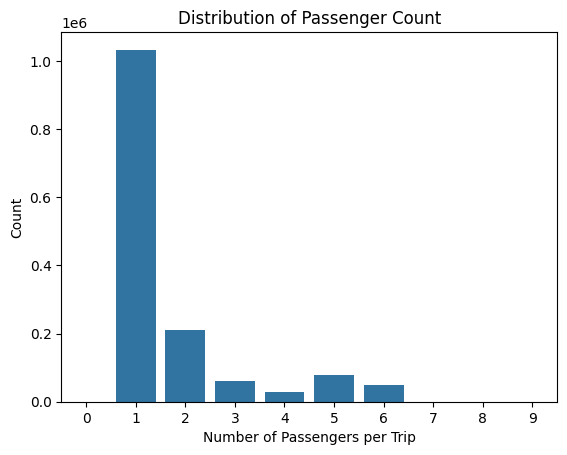

In [6]:
#plot passenger count 
sns.countplot(x='passenger_count',data=df)
plt.title('Distribution of Passenger Count')
plt.xlabel('Number of Passengers per Trip')
plt.ylabel('Count')

This plot shows the distribution of passenger counts for all taxi trips. Most rides have one passenger which indicates that individual travel is by far the most common. The number of passengers decreases sharply as passenger count increases showing that very few rides carry more than two people. 

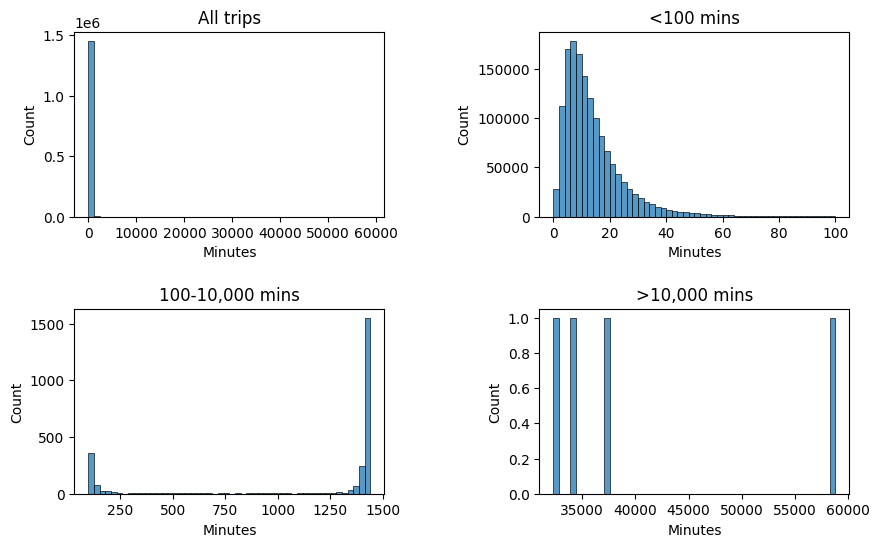

In [7]:
#plot of trip duration 
# Convert trip duration from seconds to minutes
df['trip_duration_min'] = df['trip_duration'] / 60
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.histplot(df['trip_duration_min'], bins=50, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('All trips')
axes[0, 0].set_xlabel('Minutes')
axes[0, 0].set_ylabel('Count')

sns.histplot(df[df['trip_duration_min'] < 100]['trip_duration_min'], bins=50, kde=False, ax=axes[0, 1])
axes[0, 1].set_title('<100 mins')
axes[0, 1].set_xlabel('Minutes')
axes[0, 1].set_ylabel('Count')

sns.histplot(
    df[(df['trip_duration_min'] > 100) & (df['trip_duration_min'] < 10000)]['trip_duration_min'],
    bins=50, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('100-10,000 mins')
axes[1, 0].set_xlabel('Minutes')
axes[1, 0].set_ylabel('Count')

sns.histplot(df[df['trip_duration_min'] > 10000]['trip_duration_min'], bins=50, kde=False, ax=axes[1, 1])
axes[1, 1].set_title('>10,000 mins')
axes[1, 1].set_xlabel('Minutes')
axes[1, 1].set_ylabel('Count')

plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 
plt.show()


This plot shows the distribution of trip duration. Most trips have very short durations, with a majority being around 8 minutes. However, the distribution is heavily skewed due to a few extremely large values. 

Text(0, 0.5, 'Count')

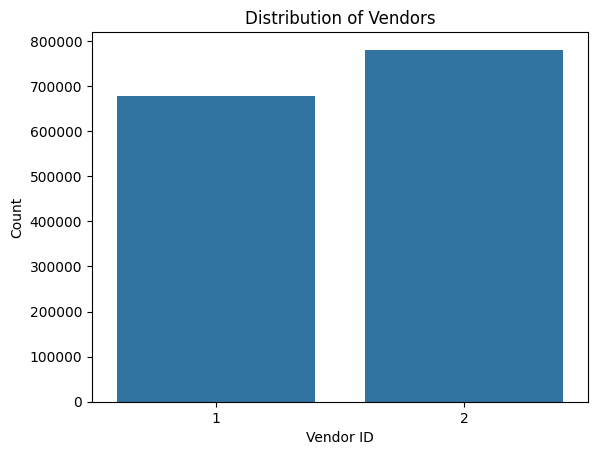

In [8]:
#trips taken by individual vendors 
sns.countplot(x='vendor_id',data=df)
plt.title('Distribution of Vendors')
plt.xlabel('Vendor ID')
plt.ylabel('Count')

The first plot illustrates the distribution of trips by vendor ID, representing the two main taxi service providers operating in the dataset. Both vendors have a relatively balanced number of recorded trips, with Vendor 2 showing a slightly higher trip count. This balance suggests that data collection across providers was consistent and not dominated by a single vendor, which is important for ensuring unbiased model training and evaluation in later stages.

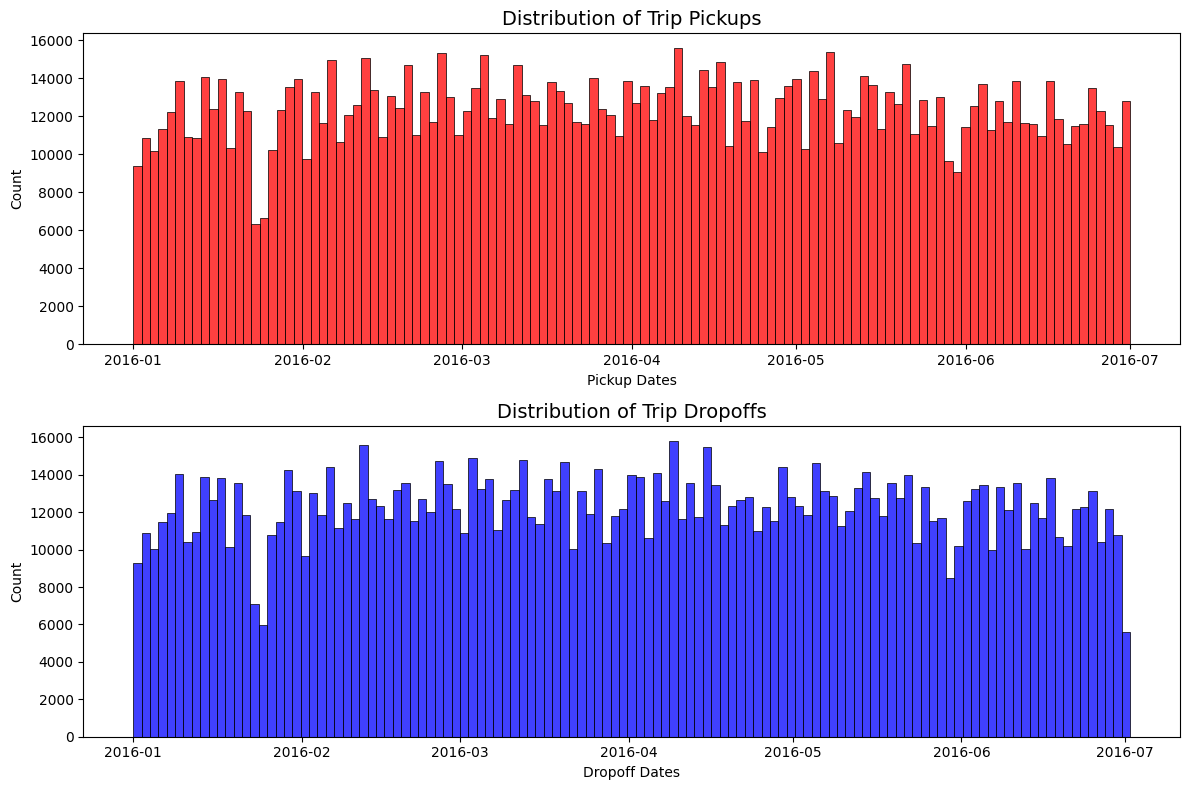

In [9]:
#plot pickup date and time
sample_df = df.sample(10000) if len(df) > 10000 else df

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

sns.histplot(x='pickup_datetime', data=df, ax=axes[0], color= 'red')
axes[0].set_title('Distribution of Trip Pickups', fontsize=14)
axes[0].set_xlabel('Pickup Dates')
axes[0].set_ylabel('Count')


sns.histplot(x='dropoff_datetime', data=df, ax=axes[1], color = 'blue')
axes[1].set_title('Distribution of Trip Dropoffs', fontsize=14)
axes[1].set_xlabel('Dropoff Dates')
axes[1].set_ylabel('Count')

plt.tight_layout()


The data indicates that trip pickups and dropoffs occurred consistently throughout the six-month period, with no significant spikes or drops in activity. This suggests steady taxi demand across time, which could indicate a stable transportation pattern during this period. Minor fluctuations may represent normal daily or weekly variations, but overall, there are no major irregularities or data gaps.

In [10]:
#create new variables for pickup_day,dropoff_day,pickup_hour,dropoff_hour to get more insight on data
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['dropoff_day'] = df['dropoff_datetime'].dt.day_name()

df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

df['pickup_month'] = df['pickup_datetime'].dt.month_name()
df['dropoff_month'] = df['dropoff_datetime'].dt.month_name()

To gain deeper insights into trip patterns, new variables were created from the pickup_datetime and dropoff_datetime columns. The pickup_day and dropoff_day variables capture the day of the week for each trip, while pickup_hour and dropoff_hour represent the specific hour of the day. These additional features make it easier to analyze temporal trends such as peak hours, weekday versus weekend activity, and variations in trip behavior over time.

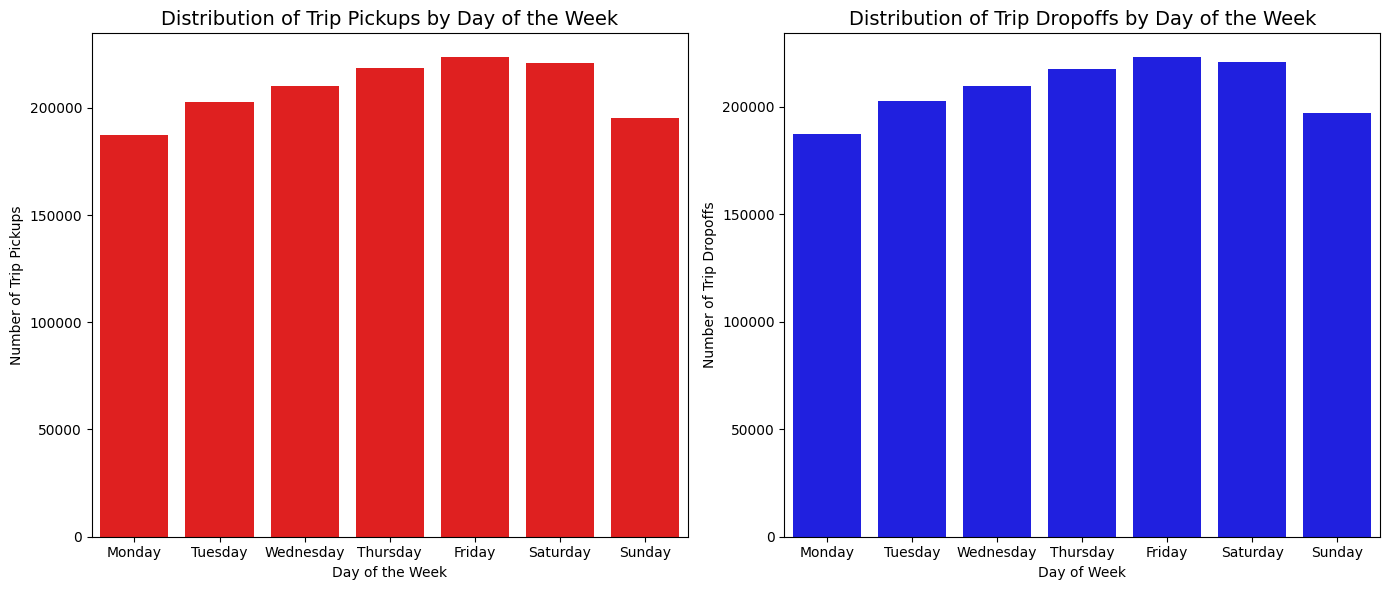

In [11]:
sample_df = df.sample(10000) if len(df) > 10000 else df

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#Plot 1: Distribution of Trip Pickups by Day of the Week
sns.countplot(x='pickup_day', data=df, ax=axes[0], color='red', order=order)
axes[0].set_title('Distribution of Trip Pickups by Day of the Week', fontsize=14)
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Number of Trip Pickups')


#Plot 2: Distribution of Trip Dropoffs by Day of the Week
sns.countplot(x='dropoff_day', data=df, ax=axes[1], color='blue', order=order)
axes[1].set_title('Distribution of Trip Dropoffs by Day of the Week', fontsize=14)
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Number of Trip Dropoffs')

# Adjust spacing between plots
plt.tight_layout()


This plot distribution shows the pickup and dropoffs by the day of the week. The data shows that pick up and drop off is relatively consistent for the week, with higher numbers on Friday and Saturday. This trend aligns with typical travel behavior, suggesting increased demand toward the end of the week. The numbers drop on Sunday, which may reflect reduced activity before the start of the new work week. 

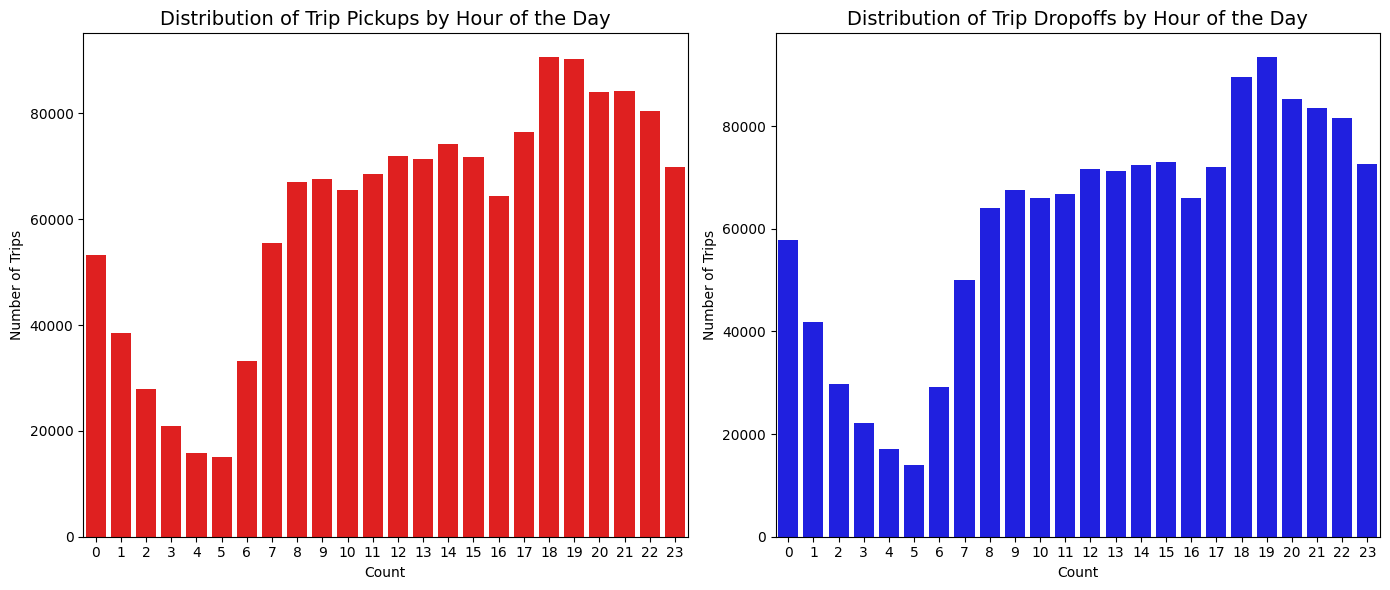

In [12]:
sample_df = df.sample(10000) if len(df) > 10000 else df

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Plot 1: Distribution of Trip Pickups by Hour of the Day
sns.countplot(x='pickup_hour', data=df, ax=axes[0], color= 'red')
axes[0].set_title('Distribution of Trip Pickups by Hour of the Day', fontsize=14)
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Number of Trips')


#Plot 2: Distribution of Trip Dropoffs by Hour of the Day
sns.countplot(x='dropoff_hour', data=df, ax=axes[1], color= 'blue')
axes[1].set_title('Distribution of Trip Dropoffs by Hour of the Day', fontsize=14)
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Number of Trips')

plt.tight_layout()


The plots above show the distribution of pickup and dropoff by hour of the day. The data indicates that most trips occur between late morning and early evening, with a peak around 6-8 PM. This pattern suggests higher taxi demands that align with the rush hour of New York. Fewer pickups and dropoffs are seen in the early morning hours (midnight to 6 AM), which is expected as overall transportation activity is lower during that time.

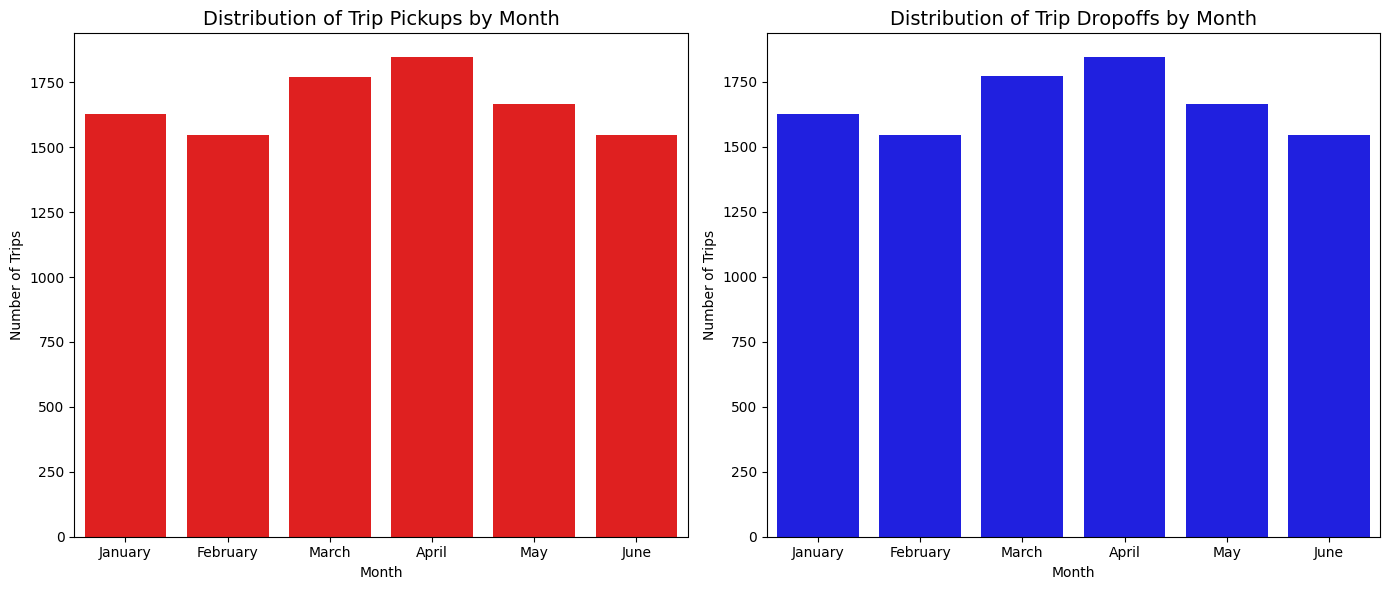

In [13]:
sample_df = df.sample(10000) if len(df) > 10000 else df

order = ['January', 'February', 'March', 'April', 'May', 'June']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Plot 1: Distribution of Trip Pickups by Month
sns.countplot(x='pickup_month', data=sample_df, ax=axes[0], order=order, color='red')
axes[0].set_title('Distribution of Trip Pickups by Month', fontsize=14)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Trips')

#Plot 2: Distribution of Trip Dropoffs by Month
sns.countplot(x='dropoff_month', data=sample_df, ax=axes[1], order=order, color='blue')
axes[1].set_title('Distribution of Trip Dropoffs by Month', fontsize=14)
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Trips')

plt.tight_layout()


The bar charts above show the monthly distribution of taxi pickups and dropoffs from January to June. Overall, trip activity remains relatively steady across the first half of the year, with March recording the highest number of trips. A gradual decline is observed from April to June, which may be influenced by seasonal weather changes. As temperatures rise in the summer months, people may be less inclined to use taxis for short distances and instead choose to walk or use alternative transportation. The similarity between pickup and dropoff trends confirms data consistency, indicating that most trips recorded have matching endpoints. Overall, the results suggest a stable demand pattern with mild seasonal variations likely tied to weather and lifestyle changes.

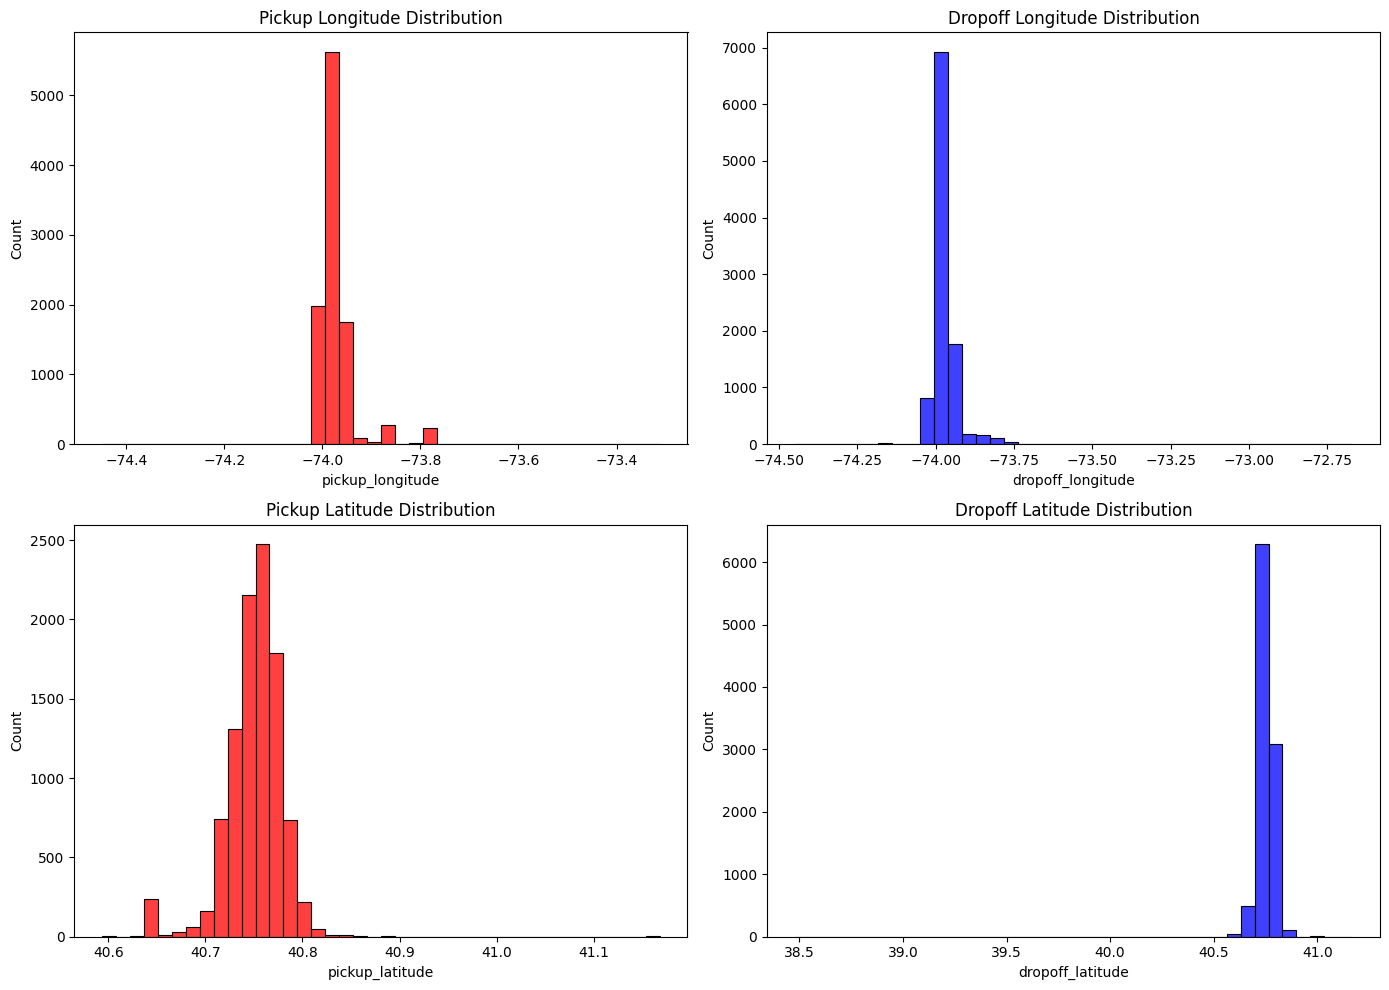

In [14]:
# sample subset
sample_df = df.sample(10000) if len(df) > 10000 else df

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#pickup Longitude
sns.histplot(
    data=sample_df,
    x='pickup_longitude',
    bins=40,
    color='red',
    ax=axes[0, 0]
)
axes[0, 0].set_title('Pickup Longitude Distribution')

#dropoff Longitude
sns.histplot(
    data=sample_df,
    x='dropoff_longitude',
    bins=40,
    color='blue',
    ax=axes[0, 1]
)
axes[0, 1].set_title('Dropoff Longitude Distribution')

#pickup Latitude
sns.histplot(
    data=sample_df,
    x='pickup_latitude',
    bins=40,
    color='red',
    ax=axes[1, 0]
)
axes[1, 0].set_title('Pickup Latitude Distribution')

#dropoff Latitude
sns.histplot(
    data=sample_df,
    x='dropoff_latitude',
    bins=40,
    color='blue',
    ax=axes[1, 1]
)
axes[1, 1].set_title('Dropoff Latitude Distribution')

plt.tight_layout()
plt.show()



The histogram plots above show the overall spatial distribution of pickup and dropoff points for all recorded taxi trips. A random sample of 10,000 data points was used to make the visualization representative while avoiding overplotting. The distributions highlight where most rides begin and end, mostly within New York City’s main areas of activity. There are also trips that fall outside the expected NYC range — these may represent journeys to airports or nearby suburbs, as well as possible GPS or data entry errors. These outlying trips will be discussed further in the Challenges section, where they will be filtered out during data cleaning.

## Check for missing values, outliers, and anomalies

Text(0.5, 1.0, 'Correlation Heatmap')

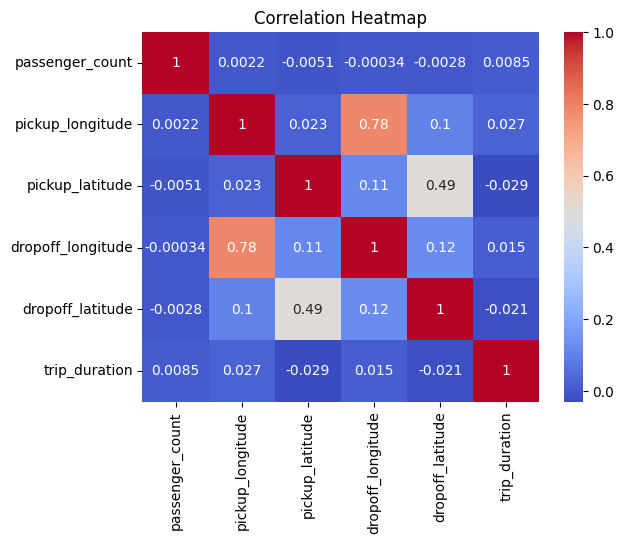

In [15]:
corr = df[['passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','trip_duration']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

The correlation heatmap shows weak linear correlations with other numerical features for trip length, and therefore none of the raw features alone meaningfully predict trip length. The most significant correlations are between pickup and dropoff points, which is expected since trips start and end in close proximity to each other. The correlation between number of passengers vs. trip duration correlation suggests that the number of passengers has little effect on trip duration. These findings show that additional feature engineering, such as computing trip distance must be accomplished to uncover more meaningful relationships for predictive modeling.

In [16]:
# haversine function to compute distance in kilometers
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    d_lat = lat2 - lat1
    d_lon = lon2 - lon1

    a = np.sin(d_lat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(d_lon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Apply function to dataframe
df['trip_distance_km'] = haversine_distance(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)

count    1.458644e+06
mean     3.440864e+00
std      4.296538e+00
min      0.000000e+00
25%      1.231837e+00
50%      2.093717e+00
75%      3.875337e+00
max      1.240909e+03
Name: trip_distance_km, dtype: float64


Text(0, 0.5, 'Trip Duration(seconds)')

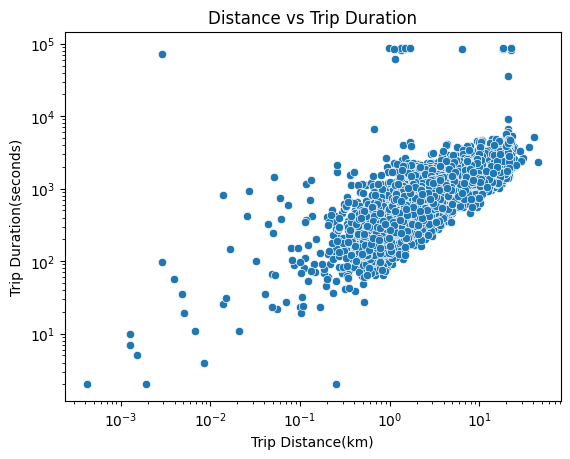

In [17]:
print(df['trip_distance_km'].describe())

sample_df = df.sample(10000) if len(df) > 10000 else df
sns.scatterplot(x='trip_distance_km', y='trip_duration', data=sample_df)
plt.title('Distance vs Trip Duration')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Trip Distance(km)')
plt.ylabel('Trip Duration(seconds)')

This scatter plot illustrates the relationship between the direct trip distance (computed using the Haversine formula) and the total trip duration for NYC taxi rides. Each point represents a single trip, with the x-axis showing the trip distance in kilometers and the y-axis showing the duration in seconds. As expected, the plot reveals a generally positive correlation; longer trips tend to take more time. However, the spread of points indicates variability likely caused by factors such as traffic, varying routes, and waiting times. A few outliers may correspond to wrong GPS readings or unusually long trips, which will require further data cleaning.

In [18]:
pickup_outliers = df[
    (df['pickup_latitude'] < 40.49) | (df['pickup_latitude'] > 40.92) |
    (df['pickup_longitude'] < -74.27) | (df['pickup_longitude'] > -73.68)
]

print(f"Number of trips starting outside NYC: {len(pickup_outliers)}")
pickup_outliers.head()

Number of trips starting outside NYC: 292


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_min,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month,trip_distance_km
13006,id3022813,1,2016-06-15 18:02:41,2016-06-15 18:03:18,1,-73.558289,40.781223,-73.558281,40.781227,N,37,0.616667,Wednesday,Wednesday,18,18,June,June,0.000770
20077,id3733479,2,2016-05-22 03:58:40,2016-05-22 03:59:02,1,-74.347069,40.708519,-74.347069,40.708523,N,22,0.366667,Sunday,Sunday,3,3,May,May,0.000424
20878,id3092519,1,2016-03-15 18:34:52,2016-03-15 18:35:34,1,-73.648560,40.657745,-73.648560,40.657742,N,42,0.700000,Tuesday,Tuesday,18,18,March,March,0.000424
30712,id1629558,2,2016-05-22 02:17:12,2016-05-22 02:17:20,2,-73.955093,40.942661,-73.955093,40.942661,N,8,0.133333,Sunday,Sunday,2,2,May,May,0.000000
31618,id2185383,1,2016-01-24 13:10:30,2016-01-24 13:11:12,1,-73.518051,41.091171,-73.518059,41.091167,N,42,0.700000,Sunday,Sunday,13,13,January,January,0.000767


Trips with pickup coordinates starting outside of NYC are being recorded as potential outliers. A total of 292 trips were found to have pickup locations outside of this range, this may be due to a few reasons including: GPS innacuracies or recording errors, trips mistakenly logged out of NYC, data points that do not align with the scope of the data set. These outliers will be removed from the main data set to maintain integrity of further analysis

In [19]:
#identify passenger outliers(rows with 0,7,8,9 passenger count) 
data = df[(df['passenger_count'] != 0) & (df['passenger_count'] <= 6)]
data['passenger_count'].value_counts()

passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
Name: count, dtype: int64

This code checks for outliers in the passenger count data. The code filters out unrealistic passenger values, such as trips recorded with 0 passengers or more than 6, since a standard taxi cannot accommodate that many people. It then counts the number of trips for each valid passenger count to better understand the overall distribution.

In [20]:
#identify the number of trips that were stored before forwarding (could produce potential anomalies) 
data['store_and_fwd_flag'].value_counts(normalize=True)

store_and_fwd_flag
N    0.994486
Y    0.005514
Name: proportion, dtype: float64

This code examines the store_and_fwd_flag variable to identify trips that were stored before being forwarded to the server. This flag indicates whether trip data was temporarily stored on the taxi’s device due to a connectivity issue (“Y”) or transmitted directly (“N”). While only 0.5% were delayed, it is important to note as these stored trips could potentially introduce small timing or location inconsistencies.

Text(0, 0.5, '')

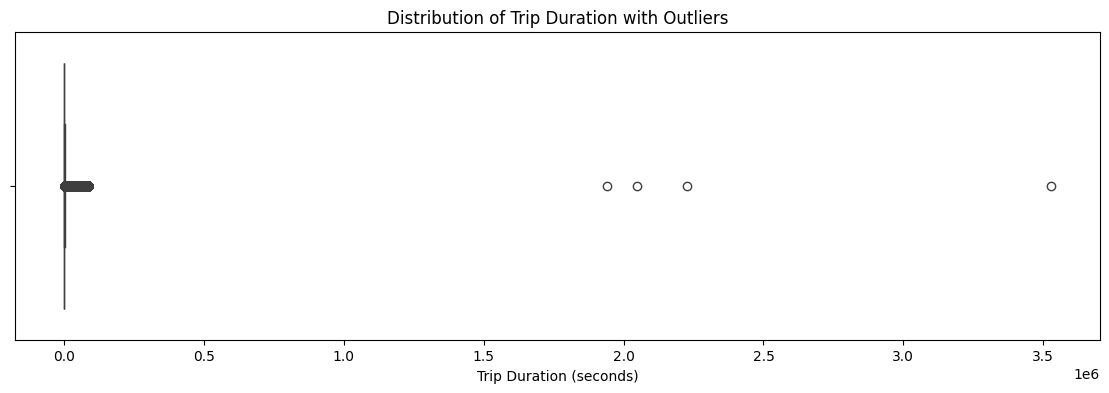

In [21]:
#identify outliers of trip duration 
plt.figure(figsize=(14, 4)) 
sns.boxplot(x=df['trip_duration'])
plt.title('Distribution of Trip Duration with Outliers')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('')


This boxplot visualizes the distribution of trip durations to identify potential outliers. Most trips have relatively short durations, but a few extremely long trips stand out as outliers. These anomalies may indicate data recording issues or unusual trips and will be investigated further during data cleaning to prevent skewing the analysis.

In [22]:
df['trip_duration'].sort_values(ascending=False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
269418           1
467645           1
533799           1
726971           1
311745           1
Name: trip_duration, Length: 1458644, dtype: int64

This step sorts all trip durations from longest to shortest to verify the presence of outliers. The results confirm several unrealistic trip durations, some lasting several million seconds; with a max of 3,526,282 seconds (40 days) and others only one second. These extreme values suggest data entry or recording errors and will need to be addressed during data cleaning to ensure accurate analysis.

## Explore relationships and correlations among features

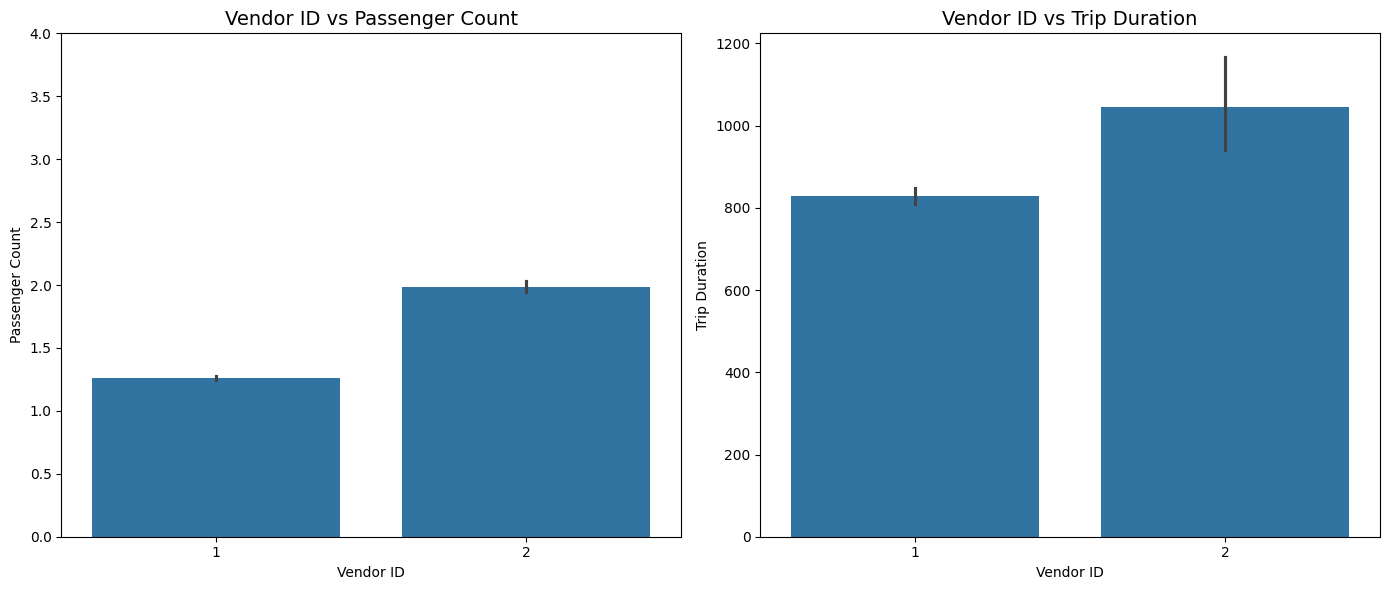

In [23]:

sample_df = df.sample(10000) if len(df) > 10000 else df


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Vendor vs Passenger Count
sns.barplot(y='passenger_count',x='vendor_id',data=sample_df, ax=axes[0])
axes[0].set_ylim(0, 4)
axes[0].set_title('Vendor ID vs Passenger Count', fontsize=14)
axes[0].set_xlabel('Vendor ID')
axes[0].set_ylabel('Passenger Count')

# Plot 2: Vendor vs Trip Duration
sns.barplot(y='trip_duration',x='vendor_id',data=sample_df,estimator=np.mean, ax=axes[1])
axes[1].set_title('Vendor ID vs Trip Duration', fontsize=14)
axes[1].set_xlabel('Vendor ID')
axes[1].set_ylabel('Trip Duration')

plt.tight_layout()

This bar plot compares the average trip durations between the two vendors. The visualization shows that Vendor 2 tends to have slightly longer average trip durations than Vendor 1. This could be due to differences in routes, trip types, or operational factors. 

This plot compares the average passenger count between the two vendors. The results show that Vendor 1 typically carries around one passenger per trip, while Vendor 2 averages closer to two passengers per trip. This suggests that Vendor 2 handles more shared rides, while Vendor 1 mainly serves single passenger trips. 

Text(30.61658950617285, 0.5, 'Trip Duration')

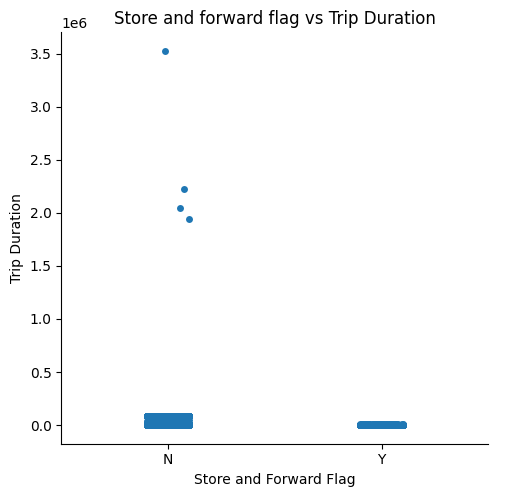

In [24]:
#Trip Duration per store and forward flag (trip duration is generally longer for trips whose flag is not stored)
sns.catplot(y='trip_duration', x='store_and_fwd_flag',data=df,kind='strip')
plt.title('Store and forward flag vs Trip Duration')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Trip Duration')

This plot shows the relationship between the store and forward flag and trip duration. The plot shows that both groups generally have short trip durations, but a few extreme outliers appear among the ‘N’ trips. These outliers could represent data errors or unusual trips and will be reviewed further.

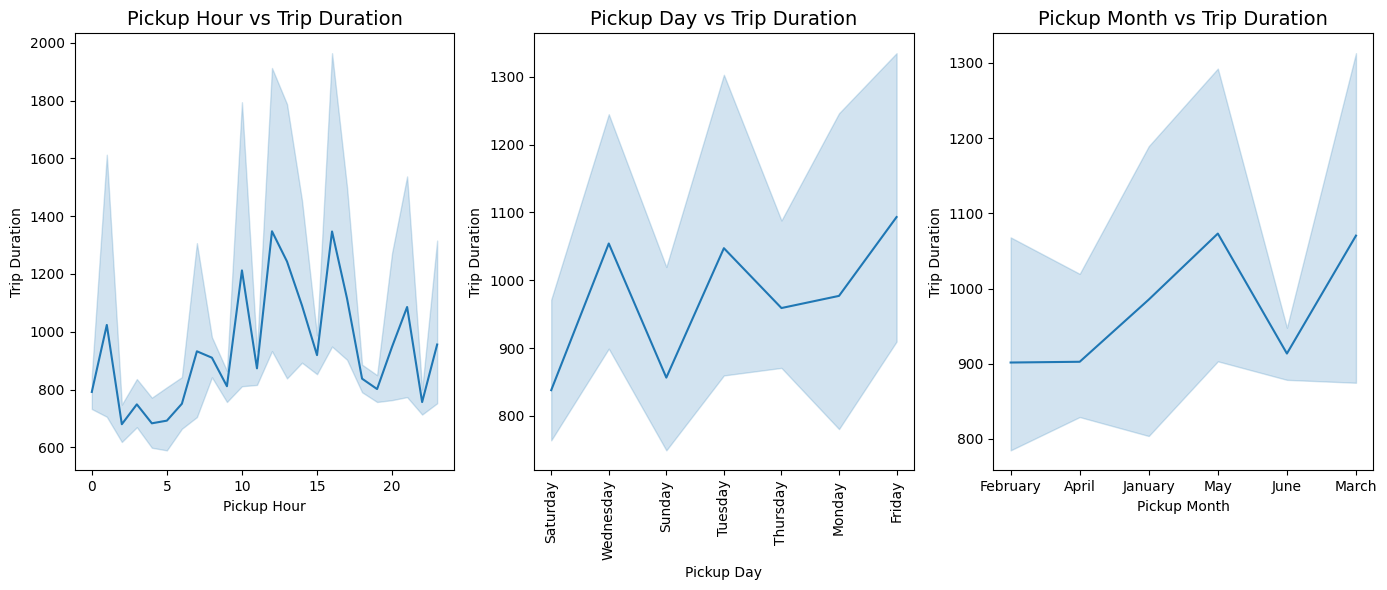

In [25]:
sample_df = df.sample(10000) if len(df) > 10000 else df

fig, axes = plt.subplots(1, 3, figsize=(14, 6))

#Plot 1: Pickup hour vs Trip Duration
sns.lineplot(y='trip_duration',x='pickup_hour',data=sample_df, ax=axes[0])
axes[0].set_title('Pickup Hour vs Trip Duration', fontsize=14)
axes[0].set_xlabel('Pickup Hour')
axes[0].set_ylabel('Trip Duration')

#Plot 2: Pickup day vs Trip Duration
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['pickup_day'] = pd.Categorical(df['pickup_day'], categories=order, ordered=True)
sns.lineplot(x='pickup_day',y='trip_duration',data=sample_df, ax=axes[1])
axes[1].set_title('Pickup Day vs Trip Duration', fontsize=14)
axes[1].set_xlabel('Pickup Day')
axes[1].set_ylabel('Trip Duration')
axes[1].tick_params(axis='x', rotation=90)

#Plot 3: Pickup month vs Trip Duration
sns.lineplot(y='trip_duration',x='pickup_month',data=sample_df, ax=axes[2])
axes[2].set_title('Pickup Month vs Trip Duration', fontsize=14)
axes[2].set_xlabel('Pickup Month')
axes[2].set_ylabel('Trip Duration')

plt.tight_layout()

The leftmost plot describes pickup hour vs. trip duration. Trip durations are generally higher during typical commuting hours (around 8–10 AM and 4–6 PM), reflecting rush-hour traffic in New York City. Trips late at night and early morning tend to be shorter, as traffic is lighter.

The middle plot illustrates trip duration vs. pickup day. Weekday trips (especially Tuesday through Thursday) have longer durations on average, consistent with higher traffic volumes during workdays. In contrast, trips on weekends (Saturday and Sunday) are faster due to reduced congestion.

The rightmost plot shows the increase in average trip duration from January to June aligns with seasonal travel patterns. A gradual increase in trip duration is observed from January through May. This may be attributed to improved weather conditions and increased city activity as the year progresses. Seasonal traffic patterns and tourism likely influence this upward trend.

## Check for target distribution

Text(0, 0.5, 'Count')

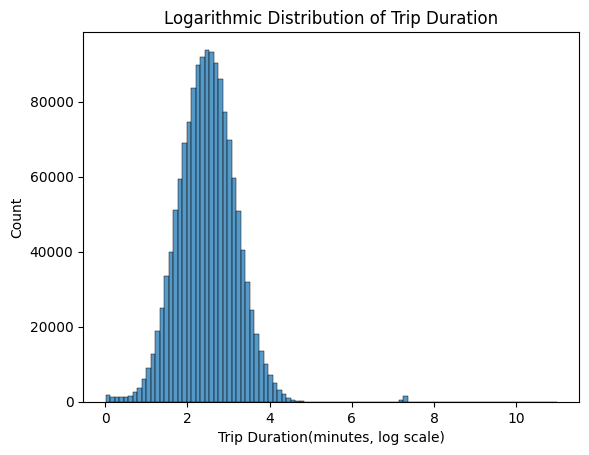

In [26]:
sns.histplot(np.log1p(df['trip_duration']/60), bins=100)
plt.title('Logarithmic Distribution of Trip Duration')
plt.xlabel('Trip Duration(minutes, log scale)')
plt.ylabel('Count')

This graph shows the distribution of the target variable, Trip Duration. Since trip_duration is the target variable for this analysis, this plot sees how it is distributed across all trips. Log transformation was employed in order to reduce the effect of extreme outliers and see the underlying pattern more clearly. Following transformation, the distribution looks almost normal, suggesting that most trips are of moderate to short lengths, and extremely long trips are quite rare. This transformation makes the target variable more suitable for modeling and predictive purposes.

## Challenges and Strategies

#### Trip Duration Outliers

The exploratory data analysis revealed a significant issue with the trip_duration variable.
The histogram of trip duration (in hours vs. count) showed a very long right tail, indicating the presence of extreme outliers.
Descriptive statistics confirmed that the maximum duration exceeded 3.5 million seconds (~40 days), while 75% of trips were under 1,075 seconds (~18 minutes).
These unrealistic values likely result from poor timestamps, GPS errors, or incorrect data entries.
They distort the mean and standard deviation and can dominate the model’s loss function, leading to unreliable predictions for typical trips.

To address this issue, a range-based filter was applied to keep only realistic trip durations.
Typical NYC taxi trips rarely last less than one minute or exceed three hours, so the dataset was restricted to trips within 60 seconds to 10,800 seconds.
All trips falling outside this range were removed to improve data quality and ensure the model learns from realistic patterns.

In [27]:
#Define realistic trip duration range (in seconds)
min_duration = 60          #1 minute
max_duration = 10800       #3 hours (3 * 60 * 60)

#Counting how many fall outside the range 
below = (df['trip_duration'] < min_duration).sum()
above = (df['trip_duration'] > max_duration).sum()
print(f"Trips below 1 minute: {below:,}")
print(f"Trips above 3 hours: {above:,}")
print(f"Total trips to remove: {below + above:,}")

#Apply range filter
df = df[(df['trip_duration'] >= min_duration) & (df['trip_duration'] <= max_duration)].copy()

print(f"Filtered dataset contains {len(df):,} trips "
      f"({below + above:,} removed, "
      f"{100 * (1 - len(df)/ (len(df) + below + above)):.2f}% reduction).")

Trips below 1 minute: 8,595
Trips above 3 hours: 2,112
Total trips to remove: 10,707
Filtered dataset contains 1,447,937 trips (10,707 removed, 0.73% reduction).


After applying the filter, the dataset now contains only trips with realistic durations.
This removed the most extreme and implausible values (such as multi-day or less than a minute trips), resulting in a cleaner, more reliable dataset.
The updated distribution now better reflects real-world taxi trip durations, improving both interpretability and later model performance.

#### Passenger Count Anomalies

The distribution of the passenger_count variable shows several invalid values, including trips recorded with 0, 7, 8, and 9 passengers.
In reality, NYC taxis must have at least one passenger per valid trip, and standard yellow or green cabs can seat a maximum of six passengers (excluding the driver).
Values outside this range are unrealistic and likely due to data entry errors or inconsistencies in record logging.
Keeping these invalid records can mislead the model by introducing noise in how passenger count relates to trip duration and fare if passenger count is ultimately used in training the model.

To ensure data validity, trips were filtered to include only those with passenger counts between 1 and 6.
This step removes trips with impossible or missing passenger numbers.

In [28]:
#Define valid passenger count range
min_passenger = 1
max_passenger = 6

#Count how many fall outside the valid range
below = (df['passenger_count'] < min_passenger).sum()
above = (df['passenger_count'] > max_passenger).sum()
print(f"Trips with fewer than 1 passenger: {below:,}")
print(f"Trips with more than 6 passengers: {above:,}")
print(f"Total trips to remove: {below + above:,}")

#Apply range filter
df = df[(df['passenger_count'] >= min_passenger) & (df['passenger_count'] <= max_passenger)].copy()

print(f"Filtered dataset contains {len(df):,} trips "
      f"({below + above:,} removed, "
      f"{100 * (1 - len(df)/ (len(df) + below + above)):.2f}% reduction).")

Trips with fewer than 1 passenger: 17
Trips with more than 6 passengers: 2
Total trips to remove: 19
Filtered dataset contains 1,447,918 trips (19 removed, 0.00% reduction).


After applying the filter, all trips now have realistic passenger counts between 1 and 6.
This correction removes invalid records (such as 0-passenger or 9-passenger entries) and reduces potential noise in model training.
The cleaned dataset better reflects real-world taxi usage patterns, allowing for more accurate and interpretable results when modeling trip duration or fare prediction.

#### Geographic Boundaries: NYC Trips Only

The initial dataset contains trips with pickup or dropoff coordinates far outside the New York City area, including points extending into neighboring states or even the ocean.
These records are unrealistic for standard NYC taxi operations and likely represent GPS errors, incorrect coordinate logging, or non-standard data entries. 
Including these outliers can make the location data and trip duration analysis less accurate.

To maintain geographic consistency, the dataset was filtered to include only trips that start and end within New York City boundaries. The coordinate limits were set to a longitude range of −74.05 to −73.70 and a latitude range of 40.60 to 40.90. These bounds cover the five boroughs and include most typical taxi activity. Trips with pickup or dropoff points outside this area were removed.

In [29]:
#Define NYC coordinate bounds
nyc_bounds = {
    'lon_min': -74.05,
    'lon_max': -73.7,
    'lat_min': 40.6,
    'lat_max': 40.9
}

#Count how many fall outside bounds
pickup_outliers = (~df['pickup_longitude'].between(nyc_bounds['lon_min'], nyc_bounds['lon_max'])) | \
                  (~df['pickup_latitude'].between(nyc_bounds['lat_min'], nyc_bounds['lat_max']))
dropoff_outliers = (~df['dropoff_longitude'].between(nyc_bounds['lon_min'], nyc_bounds['lon_max'])) | \
                   (~df['dropoff_latitude'].between(nyc_bounds['lat_min'], nyc_bounds['lat_max']))

pickup_outliers_count = pickup_outliers.sum()
dropoff_outliers_count = dropoff_outliers.sum()
total_outliers = (pickup_outliers | dropoff_outliers).sum()

print(f"Trips with pickup points outside NYC bounds: {pickup_outliers_count:,}")
print(f"Trips with dropoff points outside NYC bounds: {dropoff_outliers_count:,}")
print(f"Total trips to remove: {total_outliers:,}")

#Apply NYC filter
df_filtered = df[
    (df['pickup_longitude'].between(nyc_bounds['lon_min'], nyc_bounds['lon_max'])) &
    (df['dropoff_longitude'].between(nyc_bounds['lon_min'], nyc_bounds['lon_max'])) &
    (df['pickup_latitude'].between(nyc_bounds['lat_min'], nyc_bounds['lat_max'])) &
    (df['dropoff_latitude'].between(nyc_bounds['lat_min'], nyc_bounds['lat_max']))
].copy()

print(f"\nFiltered dataset contains {len(df_filtered):,} trips "
      f"({total_outliers:,} removed, "
      f"{100 * (1 - len(df_filtered)/ (len(df_filtered) + total_outliers)):.2f}% reduction).")

df = df_filtered

Trips with pickup points outside NYC bounds: 427
Trips with dropoff points outside NYC bounds: 5,825
Total trips to remove: 5,882

Filtered dataset contains 1,442,036 trips (5,882 removed, 0.41% reduction).


After filtering, the dataset now includes only trips that start and end within New York City. The cleaned data now has a consistent area of coverage, making location-based analysis and modeling more accurate.

# Individual Contributions

Bethany Findlay: EDA visualizations, Challenges & Strategies, Editing

Charlotte Albert: EDA, Editing

Kaykay Akpama: EDA, Editing

Kosi Udechukwu: Dataset Choice, Data Dictionary